In [1]:
MINIROCKET_PATH = 'evaluation/minirocket'
GNN_PATH = 'evaluation/gnn_minirocket'

# Carregando métricas

In [2]:
import json
from pathlib import Path
import pandas as pd

In [3]:
def load_metrics_from_folder(path: str) -> dict:
    path = Path(path)

    metrics = {
        'modelo': [],
        'accuracy': [],
        'macro_f1': []
    }

    for file in path.iterdir():

        with open(file, 'r') as f:
            curr_metrics = json.load(f)
        
        metrics['accuracy'].extend(curr_metrics['accuracy'])
        metrics['macro_f1'].extend(curr_metrics['macro_f1'])
        n_values = len(curr_metrics['macro_f1'])
        metrics['modelo'].extend([f"{file.parent.name.capitalize().replace('_', '-')} {file.stem.replace('_', ' ').capitalize()}"] * n_values)
        

    return metrics

In [4]:
multirocket_df = pd.DataFrame.from_dict(load_metrics_from_folder(MINIROCKET_PATH))
multirocket_df.head()

,modelo,accuracy,macro_f1
0,Minirocket Univariate useracceleration z,0.933333,0.920635
1,Minirocket Univariate useracceleration z,0.866667,0.855556
2,Minirocket Univariate useracceleration z,0.866667,0.853968
3,Minirocket Univariate useracceleration z,0.866667,0.876190
4,Minirocket Univariate useracceleration z,0.857143,0.861111


In [5]:
gnn_df = pd.DataFrame.from_dict(load_metrics_from_folder(GNN_PATH))
gnn_df.head()

,modelo,accuracy,macro_f1
0,Gnn-minirocket Univariate useracceleration z,0.866667,0.861111
1,Gnn-minirocket Univariate useracceleration z,0.600000,0.547619
2,Gnn-minirocket Univariate useracceleration z,0.933333,0.933333
3,Gnn-minirocket Univariate useracceleration z,0.866667,0.863492
4,Gnn-minirocket Univariate useracceleration z,0.857143,0.869444


In [6]:
metrics_df = pd.concat([multirocket_df, gnn_df], ignore_index=True)

In [7]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   modelo    80 non-null     object 
 1   accuracy  80 non-null     float64
 2   macro_f1  80 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [8]:
metrics_df.sort_values(by='modelo', inplace=True)

# Visualizando métricas

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

<Axes: xlabel='accuracy', ylabel='modelo'>

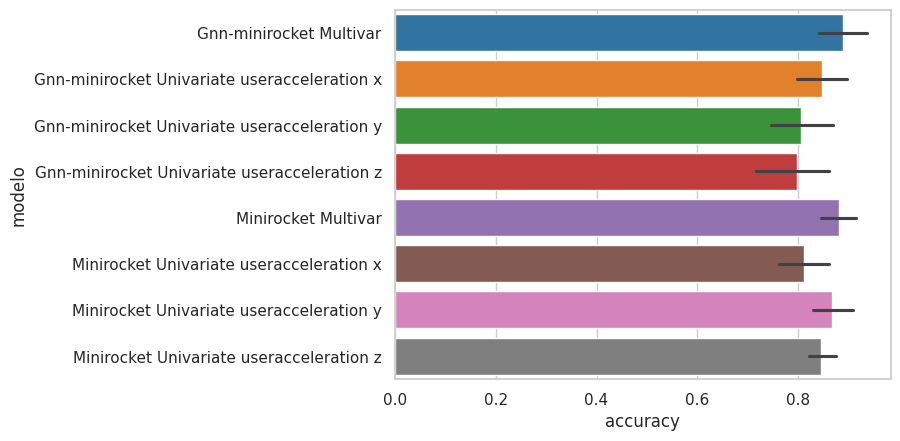

In [10]:
sns.barplot(data=metrics_df, y='modelo', hue='modelo', x='accuracy', palette='tab10', legend=False)

Text(0.5, 0, 'Macro-F1')

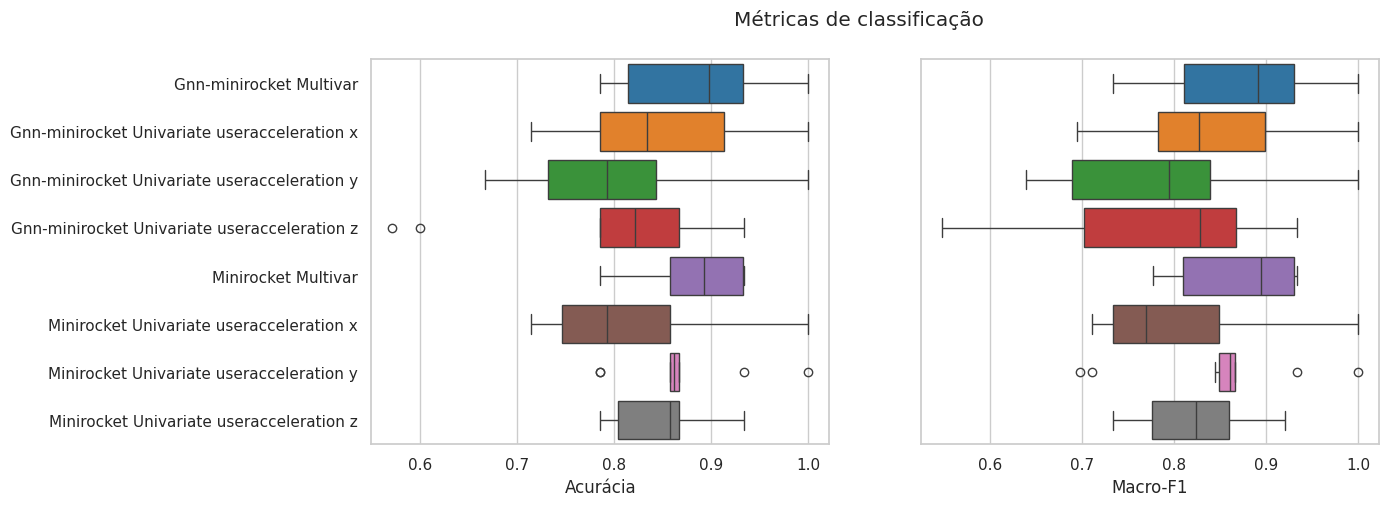

In [11]:
plt.figure(figsize=(13,5))
plt.suptitle('Métricas de classificação')
plt.subplot(121)
axes = sns.boxplot(data=metrics_df, y='modelo', hue='modelo', x='accuracy', palette='tab10', legend=False)
axes.set_ylabel('')
axes.set_xlabel('Acurácia')

plt.subplot(122)
axes = sns.boxplot(data=metrics_df, y='modelo', hue='modelo', x='macro_f1', palette='tab10', legend=False)
axes.set_ylabel('')
axes.set_yticklabels('')
axes.set_xlabel('Macro-F1')

In [12]:
metrics_df.groupby(by='modelo').describe()

accuracy                      \
                                                count      mean       std   
modelo                                                                      
Gnn-minirocket Multivar                          10.0  0.888571  0.081995   
Gnn-minirocket Univariate useracceleration x     10.0  0.846667  0.087799   
Gnn-minirocket Univariate useracceleration y     10.0  0.805714  0.101978   
Gnn-minirocket Univariate useracceleration z     10.0  0.798095  0.124402   
Minirocket Multivar                              10.0  0.881429  0.057820   
Minirocket Univariate useracceleration x         10.0  0.811429  0.087696   
Minirocket Univariate useracceleration y         10.0  0.867619  0.062886   
Minirocket Univariate useracceleration z         10.0  0.846190  0.047356   

                                                                            \
                                                   min       25%       50%   
modelo                                                                       
Gnn-minirocket Multivar                       0.785714  0.814286  0.897619   
Gnn-minirocket Univariate useracceleration x  0.714286  0.785714  0.833333   
Gnn-minirocket Univariate useracceleration y  0.666667  0.732143  0.792857   
Gnn-minirocket Univariate useracceleration z  0.571429  0.785714  0.821429   
Minirocket Multivar                           0.785714  0.857143  0.892857   
Minirocket Univariate useracceleration x      0.714286  0.746429  0.792857   
Minirocket Univariate useracceleration y      0.785714  0.857143  0.861905   
Minirocket Univariate useracceleration z      0.785714  0.803571  0.857143   

                                                                 macro_f1  \
                                                   75%       max    count   
modelo                                                                      
Gnn-minirocket Multivar                       0.932143  1.000000     10.0   
Gnn-minirocket Univariate useracceleration x  0.913095  1.000000     10.0   
Gnn-minirocket Univariate useracceleration y  0.842857  1.000000     10.0   
Gnn-minirocket Univariate useracceleration z  0.866667  0.933333     10.0   
Minirocket Multivar                           0.932143  0.933333     10.0   
Minirocket Univariate useracceleration x      0.857143  1.000000     10.0   
Minirocket Univariate useracceleration y      0.866667  1.000000     10.0   
Minirocket Univariate useracceleration z      0.866667  0.933333     10.0   

                                                                            \
                                                  mean       std       min   
modelo                                                                       
Gnn-minirocket Multivar                       0.880794  0.089314  0.733333   
Gnn-minirocket Univariate useracceleration x  0.834206  0.095887  0.694444   
Gnn-minirocket Univariate useracceleration y  0.788413  0.117170  0.638889   
Gnn-minirocket Univariate useracceleration z  0.777500  0.135901  0.547619   
Minirocket Multivar                           0.871746  0.065470  0.777778   
Minirocket Univariate useracceleration x      0.798294  0.090539  0.711111   
Minirocket Univariate useracceleration y      0.850397  0.089857  0.698413   
Minirocket Univariate useracceleration z      0.821984  0.059308  0.733333   

                                                                            \
                                                   25%       50%       75%   
modelo                                                                       
Gnn-minirocket Multivar                       0.811111  0.890873  0.930159   
Gnn-minirocket Univariate useracceleration x  0.782143  0.826984  0.898611   
Gnn-minirocket Univariate useracceleration y  0.688889  0.794444  0.839087   
Gnn-minirocket Univariate useracceleration z  0.702778  0.827778  0.867956   
Minirocket Multivar                           0.809325  0.894444  0.930159   
Miniroc

In [13]:
# TODO: diferença critica pelo aeon?